### Calculation of statistical characteristics (mean, std, skewness, kurtosis, contrast, correlation, energy, homogeneity) from regions of interest (ROIs) from images with different texture.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import skimage.util as util
import pandas as pd

from scipy.stats import kurtosis
from scipy.stats import skew
from skimage.feature import greycomatrix, greycoprops

#### Selection of 2 images with different texture:

In [3]:
imgA = Image.open("./Pictures/imA.jpg")
imgB = Image.open("./Pictures/imB.jpg")
widthA, heightA = imgA.size
widthB, heightB = imgB.size
print("The dimension of the image A is", widthA, "x", heightA)
print("The dimension of the image B is", widthB, "x", heightB)

The dimension of the image A is 640 x 400
The dimension of the image B is 927 x 617


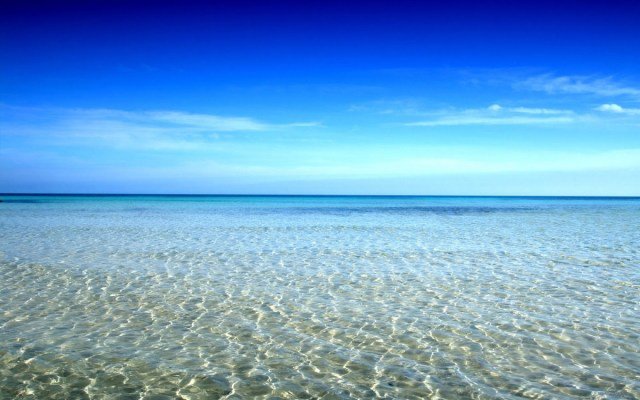

('R', 'G', 'B')

In [4]:
display(imgA)
imgA.getbands()

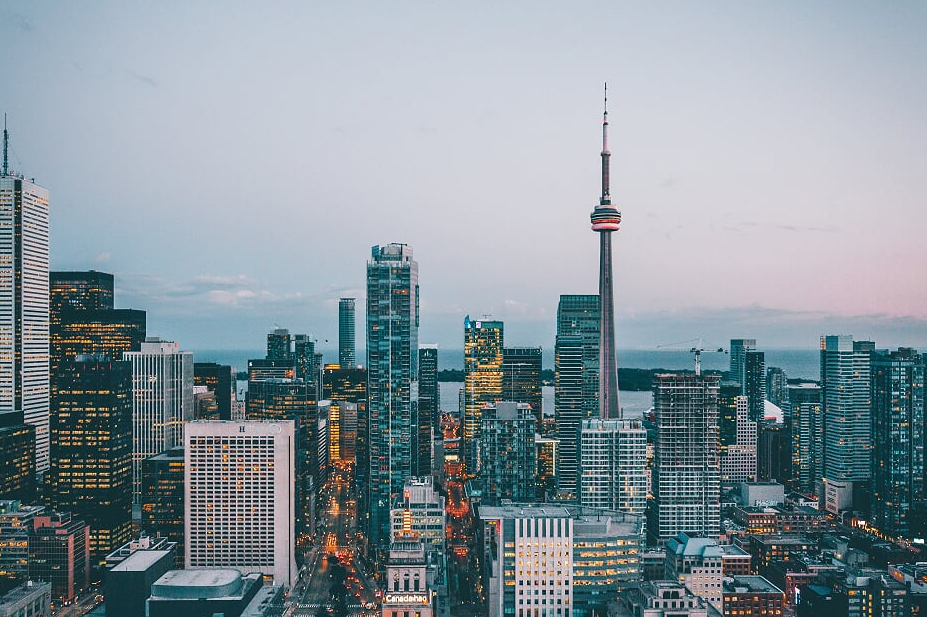

('R', 'G', 'B', 'A')

In [5]:
display(imgB)
imgB.getbands()

#### Images in grey scale:

In [6]:
imgA_grey = imgA.convert('L')    
imgB_grey = imgB.convert('L')

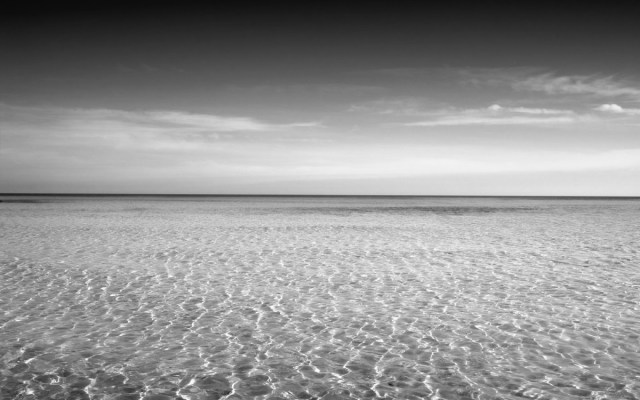

In [7]:
display(imgA_grey)
imgA_grey.save('imA_grey.jpg')

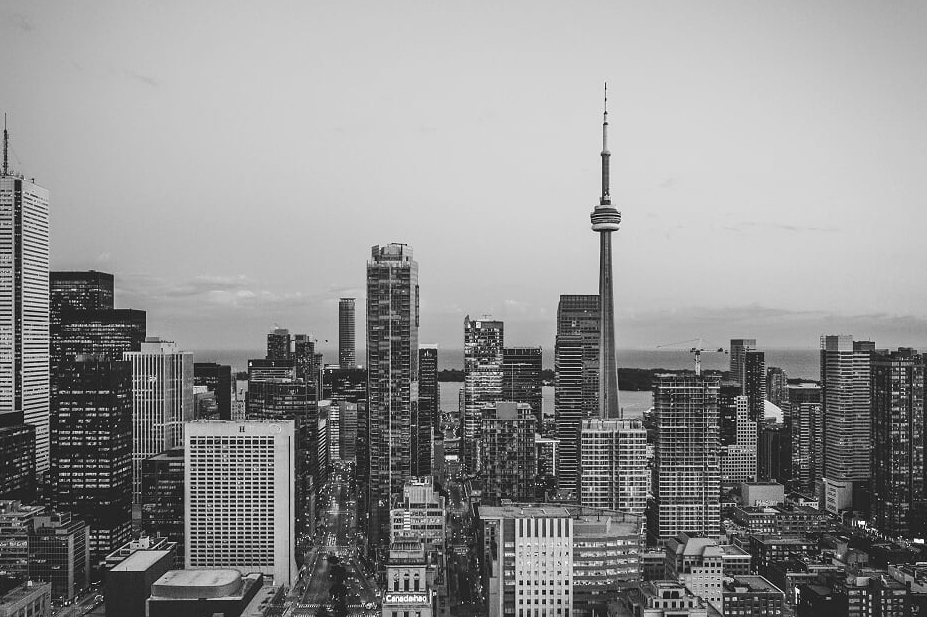

In [8]:
display(imgB_grey)
imgB_grey.save('imB_grey.jpg')

#### Smaller regions of interest (ROIs) were manually cut from the above images with names: roiA1-10.jpg from imgA and roiB1-10.jpg from imgB.

In [10]:
# load image in grayscale
roiA1 = cv.imread('./Pictures/roiA10.jpg',0)  
# convert the image to floating point format, with values in [0, 1]
roiA1arr_double = util.img_as_float(roiA1)
# shape: height x width x channel
roiA1arr_double.shape   

(30, 30)

In [11]:
mv = np.mean(roiA1arr_double)
sd = np.std(roiA1arr_double)
sk = skew(np.reshape(roiA1arr_double, -1))
ku = kurtosis(np.reshape(roiA1arr_double, -1))    

#### Calculation of the GLCM matrix of a grey scale image:

In [12]:
GLCM = greycomatrix(roiA1, [1], [0, np.pi/2, np.pi, (5*(np.pi))/4], levels=256) 

contrast = greycoprops(GLCM,'contrast') 
correlation = greycoprops(GLCM,'correlation')
energy = greycoprops(GLCM, 'energy')
homogeneity = greycoprops(GLCM,'homogeneity')

contrast = contrast.mean()
correlation = correlation.mean()
energy = energy.mean()
homogeneity = homogeneity.mean()

In [13]:
output = [mv, sd, sk, ku, contrast, correlation, energy, homogeneity]
print(output)

[0.610479302832244, 0.0995495262320212, 0.35714342423062456, 0.23245157366871272, 305.6014268727705, 0.755552017747193, 0.03773015974740125, 0.09731764377842912]


#### Calculation of the GLCM matrix of a grey scale image for all rois:

In [14]:
def roi_char(letter, i):
    roiA1 = cv.imread('./Pictures/roi' + letter + str(i) + '.jpg',0)     
    roiA1arr_double = util.img_as_float(roiA1)     
    roiA1arr_double.shape 
    
    mv = np.mean(roiA1arr_double)
    sd = np.std(roiA1arr_double)
    sk = skew(np.reshape(roiA1arr_double, -1))
    ku = kurtosis(np.reshape(roiA1arr_double, -1)) 
    
    GLCM = greycomatrix(roiA1, [1], [0, np.pi/2, np.pi, (5*(np.pi))/4], levels=256)   ## typically 256 for an 8-bit image

    contrast = greycoprops(GLCM,'contrast') 
    correlation = greycoprops(GLCM,'correlation')
    energy = greycoprops(GLCM, 'energy')
    homogeneity = greycoprops(GLCM,'homogeneity')

    contrast = contrast.mean()
    correlation = correlation.mean()
    energy = energy.mean()
    homogeneity = homogeneity.mean()
    
    output = [mv, sd, sk, ku, contrast, correlation, energy, homogeneity]
    return output

#### The fA.txt and fB.txt fles contain the GLCM matrices from rois from imgA and imgB respectivelly. Each row corresponds to one of the rois and each column coresponds to: mean, std, skewness, kurtosis, contrast, correlation, energy, homogeneity

In [15]:
fA_output = []
for i in range(1,11):    
    output = roi_char('A',i)
    fA_output.append(output)
df = pd.DataFrame(fA_output)

pd.DataFrame.to_csv(df,'fa.txt', sep='\t',header=False,index=False)

In [16]:
fA_output = []
for i in range(1,11):    
    output = roi_char('B',i)
    fA_output.append(output)
df = pd.DataFrame(fA_output)

pd.DataFrame.to_csv(df,'fb.txt', sep='\t',header=False,index=False)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import skimage.util as util
import pandas as pd

from scipy.stats import kurtosis
from scipy.stats import skew
from skimage.feature import greycomatrix, greycoprops

In [17]:
pip freeze

absl-py==0.11.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
appdirs==1.4.4
argh==0.26.2
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0
astunparse==1.6.3
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1605305165209/work
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.8.1
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
blis==0.7.4
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.2
bs4==0.0.1
cachetools==4.2.1
catalogue==1.0.0
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
ChemListem==0.1.0
Click==7.0
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
conda==4.9.2
conda-build==3.18.11
conda-package-handling @ file:///tmp/build/80754af9/conda-package-handling_1603018138503/work
conda-verify==3.4.2
contextlib2==0.6.0.post1
cryptography==2.8
cssselect==1.1.0
cycler==0.10.0
c